In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()



 Quantum Embedding and Quantum Self-Attention Mechanism using Qiskit:

### Quantum Embedding:

For simplicity, let's assume we have 2-dimensional classical embeddings (e.g., [0.7, 0.3]) for tokens. We'll normalize and convert these into quantum states using amplitude encoding.

### Quantum Self-Attention Mechanism:

We'll design a simple quantum circuit to compute a "quantum dot product" for the Q and K vectors. The result will be a probability measurement, which we'll translate into classical scores.



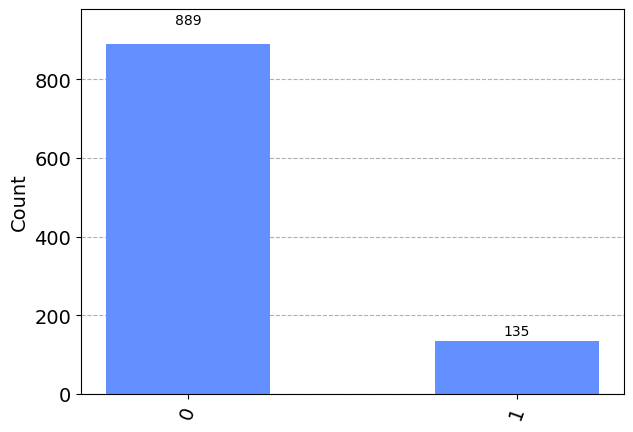

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Quantum Embedding: Amplitude Encoding
def quantum_embedding(vector):
    norm = np.linalg.norm(vector)
    normalized_vector = vector / norm
    qc = QuantumCircuit(1)
    qc.initialize(normalized_vector, 0)
    return qc

# Quantum Dot Product: Simplified for demonstration
def quantum_dot_product(qc, qubit):
    qc.h(qubit)  # Apply a Hadamard for simple interference

# Test
token_embedding = [0.7, 0.3]
qc = quantum_embedding(token_embedding)

# For demonstration, we'll use the same embedding as both Q and K
quantum_dot_product(qc, 0)

# Measurement to get attention score
qc.measure_all()

# Execute
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
results = execute(qc, backend).result()
counts = results.get_counts()

plot_histogram(counts)


This code initializes a token's embedding as a quantum state and then applies a simplified quantum dot product. The histogram shows the probability distribution, which can be translated into attention scores.

Remember, this is a very simplified and abstracted version of just a part of the quantum transformer. The actual process would be much more involved, especially when dealing with real datasets and embeddings. The circuits would be more complex, and you'd need to design quantum routines for other parts of the self-attention mechanism.

Moreover, this is a conceptual design, and its practicality, efficiency, and performance compared to classical transformers remain open questions. However, I think of it as a starting point for exploration and experimentation in the realm of quantum machine learning.

### More advanced version



### Advanced Quantum Self-Attention:

1. **Quantum Embedding**:
   * For this demonstration, we'll stick to 2-dimensional embeddings. However, in real-world scenarios, you might want to use techniques like truncated Singular Value Decomposition (SVD) to reduce the dimensionality of embeddings to make them fit into a quantum circuit.

2. **Quantum Attention Scores**:
   * We'll implement a quantum routine to compute the attention scores using the "quantum dot product."
   * For simplicity, let's assume our tokens are embedded in a 2D space, and we'll use a 2-qubit system to represent each embedding.

3. **Quantum Softmax**:
   * Implementing a quantum softmax is tricky. For this demonstration, we'll compute attention scores quantumly and then apply the softmax classically. In a full-fledged quantum model, you'd want to explore quantum routines for this operation as well.



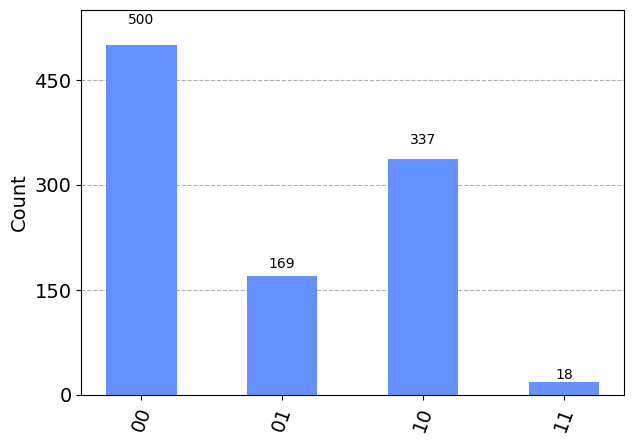

In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

def quantum_embedding(vector):
    norm = np.linalg.norm(vector)
    normalized_vector = vector / norm
    qc = QuantumCircuit(1)
    qc.initialize(normalized_vector, 0)
    return qc

def quantum_dot_product(qc):
    # A simple interference-based dot product for demonstration
    qc.h([0,1])
    qc.cz(0,1)
    qc.h([0,1])

# Test
token_embedding_Q = [0.7, 0.3]  # Embedding for the Query
token_embedding_K = [0.6, 0.4]  # Embedding for the Key

qc_Q = quantum_embedding(token_embedding_Q)
qc_K = quantum_embedding(token_embedding_K)

# Merging the two circuits for Q and K
merged_qc = QuantumCircuit(2, 2)
merged_qc.compose(qc_Q, [0], inplace=True)
merged_qc.compose(qc_K, [1], inplace=True)

# Applying the quantum dot product
quantum_dot_product(merged_qc)

# Measure the qubits representing the Q embedding
merged_qc.measure([0,1], [0,1])

# Execute
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(merged_qc, backend)
qobj = assemble(t_qc)
results = execute(merged_qc, backend).result()
counts = results.get_counts()

plot_histogram(counts)



In this advanced version, we've separated the embeddings for the Query and Key, represented them on separate qubits, and then applied the quantum dot product operation. The resulting histogram provides attention scores, which can then be normalized using a classical softmax function to get the final weights for the attention mechanism.

Remember, this is still a simplified and abstracted version, but it's a step forward from the basic one. The real-world implementation would require handling higher-dimensional embeddings, a more intricate quantum dot product routine, quantum softmax, and other necessary quantum routines for the complete self-attention mechanism.